In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


In [25]:
# Cargar datasets
movies_df = pd.read_csv('C:/PI1/movies_cleaned_fixed.csv')
credits_df = pd.read_csv('C:/PI1/credits.csv')

In [27]:
# --- Información General ---
print("Información general del dataset de películas:")
print(movies_df.info())


Información general del dataset de películas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24455 entries, 0 to 24454
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 24223 non-null  float64
 1   name               24455 non-null  object 
 2   budget             24454 non-null  float64
 3   id.1               24455 non-null  object 
 4   original_language  24452 non-null  object 
 5   overview           24251 non-null  object 
 6   popularity         24454 non-null  float64
 7   release_date       24454 non-null  object 
 8   revenue            24454 non-null  float64
 9   runtime            24411 non-null  float64
 10  status             24421 non-null  object 
 11  tagline            13683 non-null  object 
 12  title              24454 non-null  object 
 13  vote_average       24454 non-null  float64
 14  vote_count         24454 non-null  float64
 15  release_year       24454

In [28]:
print("\nInformación general del dataset de créditos:")
print(credits_df.info())


Información general del dataset de créditos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45439 entries, 0 to 45438
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None


In [29]:
# --- Chequeo de Valores Nulos ---
print("\nValores nulos en el dataset de películas:")
print(movies_df.isnull().sum())


Valores nulos en el dataset de películas:
id                     232
name                     0
budget                   1
id.1                     0
original_language        3
overview               204
popularity               1
release_date             1
revenue                  1
runtime                 44
status                  34
tagline              10772
title                    1
vote_average             1
vote_count               1
release_year             1
return                   0
dtype: int64


In [30]:
print("\nValores nulos en el dataset de créditos:")
print(credits_df.isnull().sum())


Valores nulos en el dataset de créditos:
cast    0
crew    0
id      0
dtype: int64


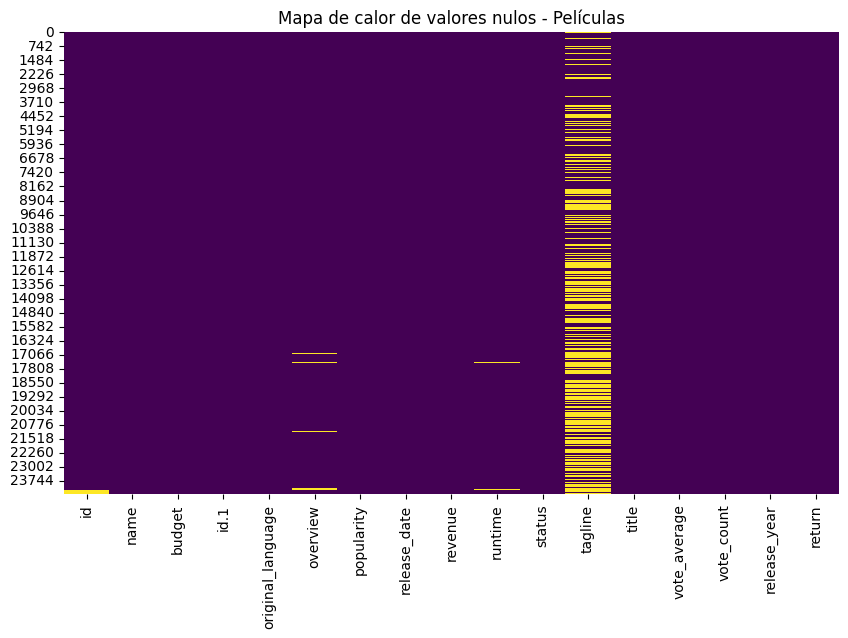

In [31]:
# Visualización de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(movies_df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos - Películas')
plt.show()

In [32]:
# --- Chequeo de Valores Duplicados ---
print(f"\nValores duplicados en películas: {movies_df.duplicated().sum()}")
print(f"Valores duplicados en créditos: {credits_df.duplicated().sum()}")


Valores duplicados en películas: 0
Valores duplicados en créditos: 0


In [33]:
# --- Tipos de Datos ---
print("\nTipos de datos en el dataset de películas:")
print(movies_df.dtypes)


Tipos de datos en el dataset de películas:
id                   float64
name                  object
budget               float64
id.1                  object
original_language     object
overview              object
popularity           float64
release_date          object
revenue              float64
runtime              float64
status                object
tagline               object
title                 object
vote_average         float64
vote_count           float64
release_year         float64
return               float64
dtype: object


In [34]:
# --- Análisis Estadístico ---
print("\nEstadísticas descriptivas del dataset de películas:")
print(movies_df.describe())


Estadísticas descriptivas del dataset de películas:
                  id        budget    popularity       revenue       runtime  \
count   24223.000000  2.445400e+04  24454.000000  2.445400e+04  24411.000000   
mean    38959.308880  6.573710e+06      3.877980  1.742709e+07     99.395477   
std     50670.757173  2.105007e+07      5.183617  7.602512e+07     32.985136   
min         1.000000  0.000000e+00      0.000000  0.000000e+00      0.000000   
25%      8486.500000  0.000000e+00      0.680371  0.000000e+00     89.000000   
50%     22665.000000  0.000000e+00      1.985024  0.000000e+00     97.000000   
75%     58248.500000  3.707500e+05      6.051451  0.000000e+00    110.000000   
max    479888.000000  3.800000e+08    213.849907  2.787965e+09   1256.000000   

       vote_average    vote_count  release_year        return  
count  24454.000000  24454.000000  24454.000000  2.445500e+04  
mean       5.906563    164.725157   1988.962746  1.183574e+03  
std        1.597314    597.167359 

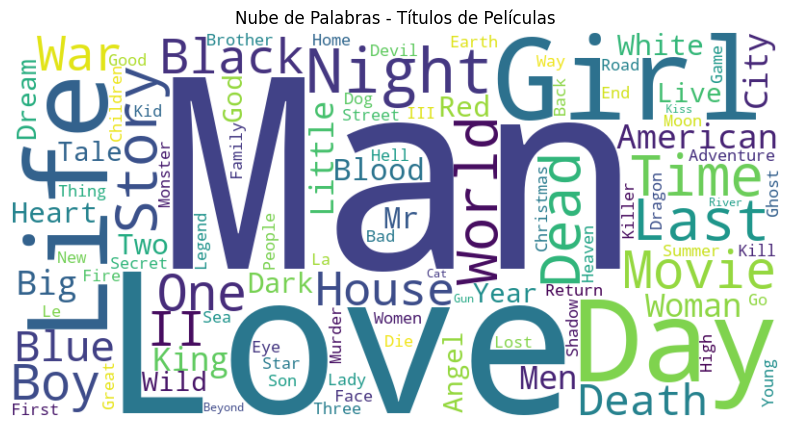

In [36]:
# --- Nube de Palabras de Títulos ---
all_titles = " ".join(movies_df['title'].dropna())
wordcloud_titles = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Títulos de Películas")
plt.show()

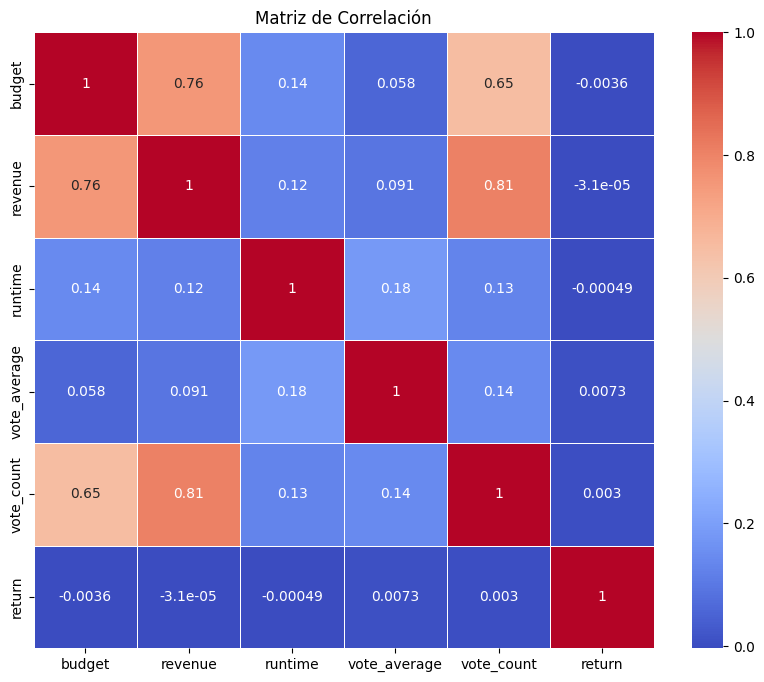

In [37]:
# --- Análisis de Correlación ---
correlation_matrix = movies_df[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

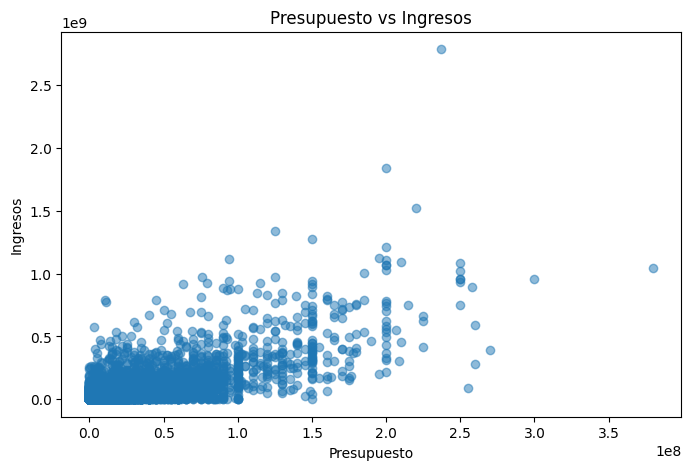

In [38]:
# --- Análisis Bivariado: Gráficas de Dispersión ---
plt.figure(figsize=(8, 5))
plt.scatter(movies_df['budget'], movies_df['revenue'], alpha=0.5)
plt.title('Presupuesto vs Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

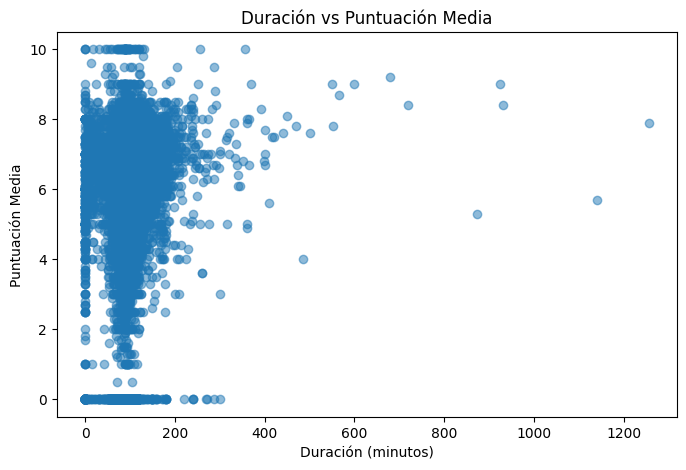

In [39]:
plt.figure(figsize=(8, 5))
plt.scatter(movies_df['runtime'], movies_df['vote_average'], alpha=0.5)
plt.title('Duración vs Puntuación Media')
plt.xlabel('Duración (minutos)')
plt.ylabel('Puntuación Media')
plt.show()

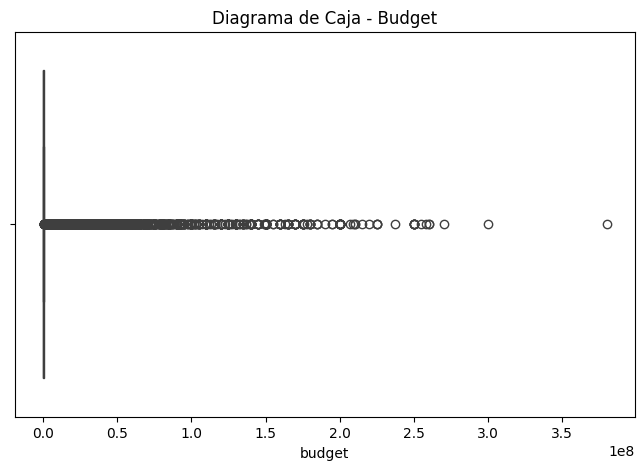

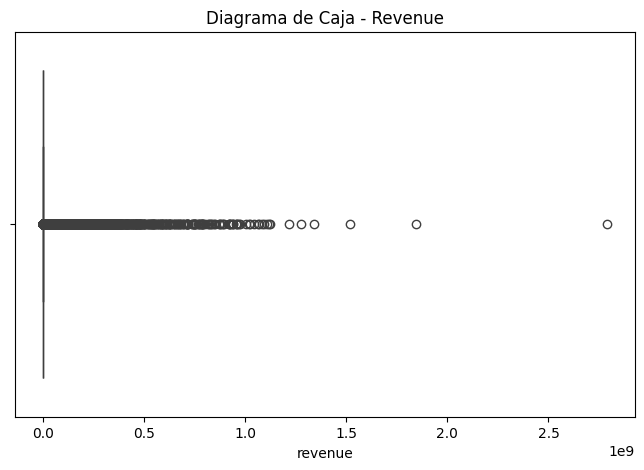

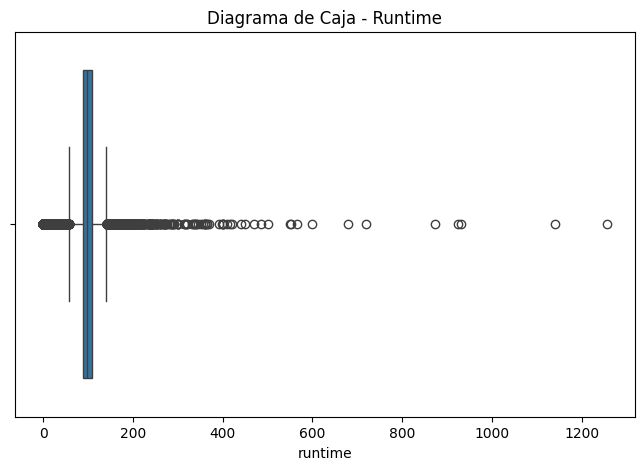

In [40]:
# --- Diagramas de Caja para Outliers ---
variables_for_boxplot = ['budget', 'revenue', 'runtime']
for var in variables_for_boxplot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=movies_df, x=var)
    plt.title(f'Diagrama de Caja - {var.capitalize()}')
    plt.show()

In [41]:
# --- Conclusiones ---
print("Conclusiones del EDA:")
print("1. Se detectaron variables con valores nulos, especialmente en 'overview' y 'tagline'.")
print("2. Se identificaron outliers en 'budget' y 'revenue'.")
print("3. Existe una correlación positiva entre 'budget' y 'revenue', lo que indica que las películas con mayor presupuesto tienden a generar más ingresos.")
print("4. La nube de palabras muestra que términos como 'Love', 'War' y 'Adventure' son comunes en los títulos de películas, indicando temas recurrentes.")

print("Se recomienda manejar los valores nulos y explorar filtros adicionales para entender mejor los patrones de puntuación y duración.")

Conclusiones del EDA:
1. Se detectaron variables con valores nulos, especialmente en 'overview' y 'tagline'.
2. Se identificaron outliers en 'budget' y 'revenue'.
3. Existe una correlación positiva entre 'budget' y 'revenue', lo que indica que las películas con mayor presupuesto tienden a generar más ingresos.
4. La nube de palabras muestra que términos como 'Love', 'War' y 'Adventure' son comunes en los títulos de películas, indicando temas recurrentes.
Se recomienda manejar los valores nulos y explorar filtros adicionales para entender mejor los patrones de puntuación y duración.
